In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=42)

In [9]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [10]:
y_train.unique()

array([1, 0])

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
classifier=RandomForestClassifier(max_depth=10)

In [13]:
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [14]:
y_pred=classifier.predict(x_test)

In [15]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [16]:
from sklearn.metrics import  confusion_matrix,accuracy_score,classification_report

In [17]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[33  9]
 [ 9 49]]
0.82
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        42
           1       0.84      0.84      0.84        58

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot: >

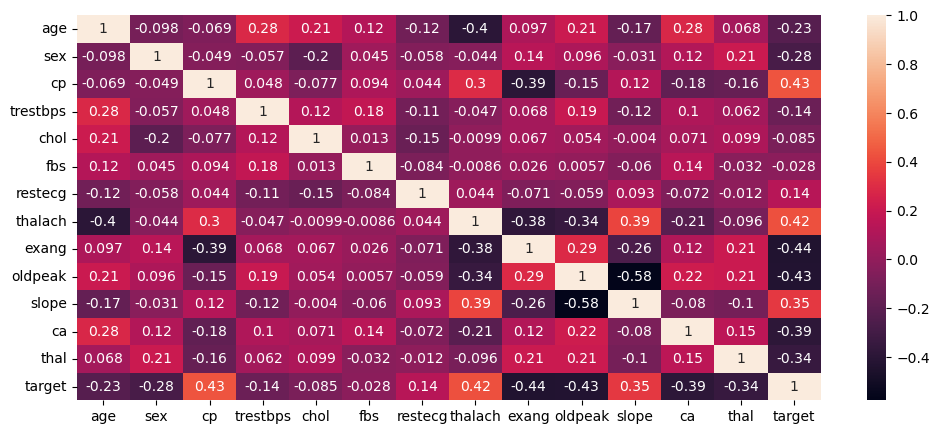

In [19]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

cp,thalach and slope are the most important feature for heart disease

In [20]:
# Hyperparameter Tuning
params={'max_depth':[3,5,10,],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy'],
               'min_samples_split':[2,3,4,5],
               'min_samples_leaf':[1,2,3,4]
              }

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.878 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.878 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.756 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.875 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.775 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.878 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.902 total time= 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [23]:
cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 3,
 'criterion': 'gini'}

In [24]:
classifier=RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_split=5,min_samples_leaf=4,criterion="gini")

In [25]:
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=5)

In [26]:
y1_pred=classifier.predict(x_test)

In [27]:
print(confusion_matrix(y_test,y1_pred))
print(accuracy_score(y_test,y1_pred))
print(classification_report(y_test,y1_pred))

[[33  9]
 [ 7 51]]
0.84
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.85      0.88      0.86        58

    accuracy                           0.84       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



Getting  High Accuracy After Hypertuning The Model
Tuned model Accuracy=0.82
Default model Accuracy=0.84